In [100]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.cluster import DBSCAN
#from model import SimCLRModel
#from mlp import MLP
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else (torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from torchvision import transforms
from image_dataset_reader import HistImagesDataset

path_to_tissues = (
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_brain", 'label': 'brain', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_heart", 'label': 'heart', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_kidney", 'label': 'kidney', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_liver", 'label': 'liver', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_lung", 'label': 'lung', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_pancreas", 'label': 'pancreas', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_mouse_spleen", 'label': 'spleen', 'ext': 'png'},
        {'folder': "/n/home11/nswood/anomaly-detection-in-histology/data/train/mt_rat_liver", 'label': 'liver_rat', 'ext': 'png'},
     )

n_samples_per_folder = 5000 # number of image samples to test on
n_classes = 16 # number of classes the model was trained on

tr_normalize = transforms.Normalize(mean=(0.5788, 0.3551, 0.5655), std=(1, 1, 1))
transforms_seq = transforms.Compose([transforms.ToTensor(), tr_normalize])
dset = HistImagesDataset(*path_to_tissues, n_samples=n_samples_per_folder, transform=transforms_seq)

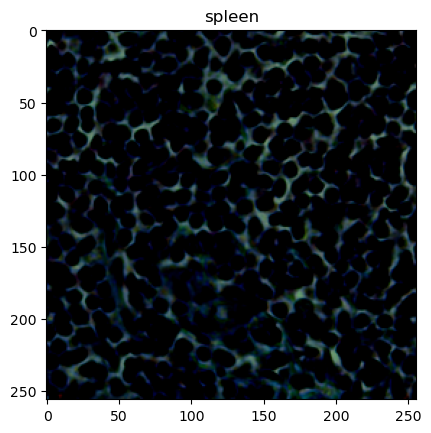

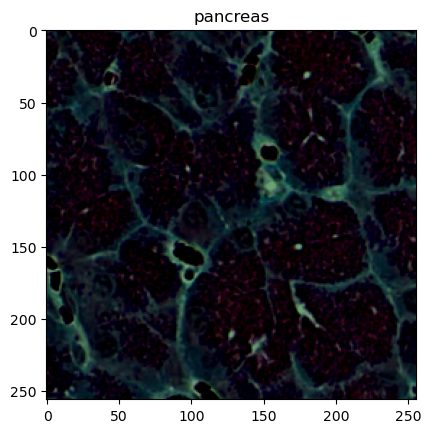

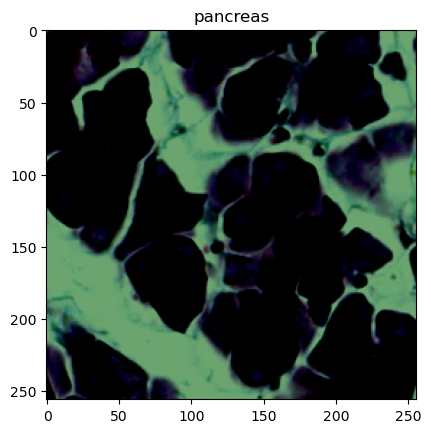

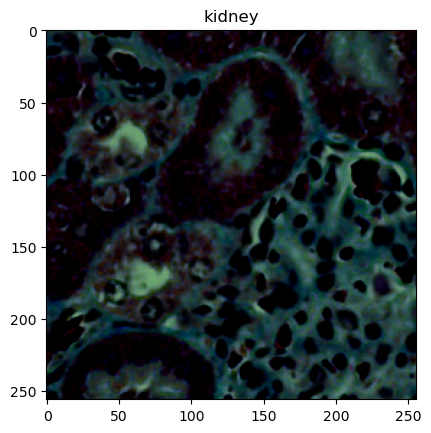

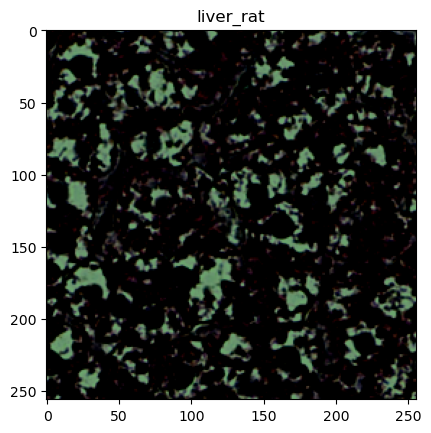

In [102]:
for i in range(5):
    img = dset[i]['image'].permute(1, 2, 0)
    img = img.numpy()
    plt.imshow(img)
    plt.title(dset[i]['string_label'])
    plt.show()

In [103]:
generator = torch.Generator().manual_seed(42)
trainset, testset = torch.utils.data.random_split(dset, [0.8,0.2], generator=generator)

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
  rank_zero_warn(
/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'projector' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['projector'])`.
  rank_zero_warn(
  4%|▍         | 1/25 [01:03<25:33, 63.91s/it]

Epoch [1/25], Loss: 0.0092


  8%|▊         | 2/25 [02:06<24:18, 63.42s/it]

Epoch [2/25], Loss: 0.0086


 12%|█▏        | 3/25 [03:10<23:13, 63.32s/it]

Epoch [3/25], Loss: 0.0081


 16%|█▌        | 4/25 [04:13<22:07, 63.19s/it]

Epoch [4/25], Loss: 0.0077


 20%|██        | 5/25 [05:16<21:02, 63.12s/it]

Epoch [5/25], Loss: 0.0073


 24%|██▍       | 6/25 [06:19<20:00, 63.16s/it]

Epoch [6/25], Loss: 0.0069


 28%|██▊       | 7/25 [07:22<18:56, 63.12s/it]

Epoch [7/25], Loss: 0.0068


 32%|███▏      | 8/25 [08:25<17:52, 63.08s/it]

Epoch [8/25], Loss: 0.0066


 36%|███▌      | 9/25 [09:28<16:50, 63.14s/it]

Epoch [9/25], Loss: 0.0064


 40%|████      | 10/25 [10:31<15:46, 63.10s/it]

Epoch [10/25], Loss: 0.0063


 44%|████▍     | 11/25 [11:34<14:43, 63.08s/it]

Epoch [11/25], Loss: 0.0062


 48%|████▊     | 12/25 [12:37<13:39, 63.06s/it]

Epoch [12/25], Loss: 0.0061


 52%|█████▏    | 13/25 [13:40<12:36, 63.05s/it]

Epoch [13/25], Loss: 0.0061


 56%|█████▌    | 14/25 [14:43<11:33, 63.05s/it]

Epoch [14/25], Loss: 0.0059


 60%|██████    | 15/25 [15:46<10:30, 63.06s/it]

Epoch [15/25], Loss: 0.0060


 64%|██████▍   | 16/25 [16:49<09:27, 63.06s/it]

Epoch [16/25], Loss: 0.0059


 68%|██████▊   | 17/25 [17:52<08:24, 63.04s/it]

Epoch [17/25], Loss: 0.0058


 72%|███████▏  | 18/25 [18:55<07:21, 63.02s/it]

Epoch [18/25], Loss: 0.0057


 76%|███████▌  | 19/25 [19:59<06:18, 63.03s/it]

Epoch [19/25], Loss: 0.0057


 80%|████████  | 20/25 [21:01<05:15, 63.00s/it]

Epoch [20/25], Loss: 0.0056


 84%|████████▍ | 21/25 [22:05<04:12, 63.08s/it]

Epoch [21/25], Loss: 0.0057


 88%|████████▊ | 22/25 [23:08<03:09, 63.04s/it]

Epoch [22/25], Loss: 0.0055


 92%|█████████▏| 23/25 [24:11<02:06, 63.04s/it]

Epoch [23/25], Loss: 0.0057


 96%|█████████▌| 24/25 [25:14<01:03, 63.02s/it]

Epoch [24/25], Loss: 0.0055


100%|██████████| 25/25 [26:17<00:00, 63.09s/it]

Epoch [25/25], Loss: 0.0056


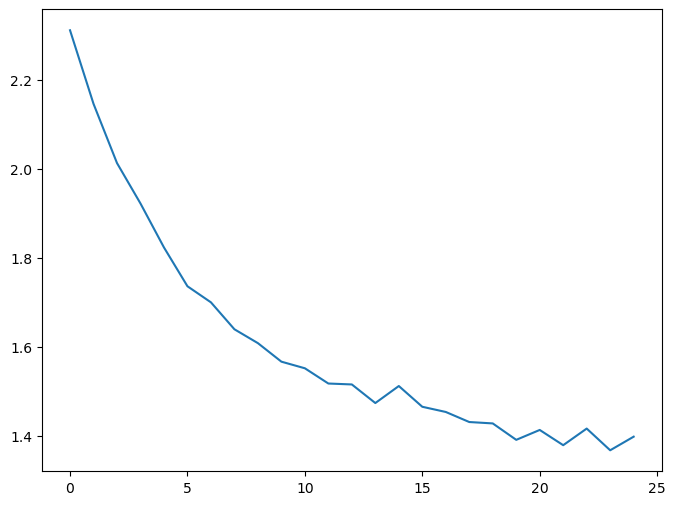

In [107]:
import sys
sys.path.append('../../')

from models.losses import SupervisedSimCLRLoss
from models.networks import CustomEfficientNet
from models.networks import MLP
from models.litmodels import SimCLRModel
from tqdm import tqdm

temp = 0.05
criterion = SupervisedSimCLRLoss(temperature=temp)
#dim = data[0]

# Define a dummy CNN model
embed_dim = 8
embedder = CustomEfficientNet(fc_hidden=[128,128,128],fc_out=embed_dim, dropout=0.1).to(device)
projector = MLP(input_dim=embed_dim,hidden_dims=[embed_dim],output_dim=embed_dim).to(device)
model = SimCLRModel(embedder, projector).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 25
batch_size = 32
dataloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

losses = []
for epoch in tqdm(range(num_epochs)):
    model.train()
    epoch_loss = []
    for sample in dataloader:
        img = sample['image']
        labels = sample['label'].to(device)
        batch_data = img.float().to(device)

        # Potential to add any augmentation here
        features = model(batch_data).unsqueeze(1)
        
        # Compute SimCLR loss
        loss = criterion(features,labels=labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss.append(loss.item())
    mean_loss = np.mean(epoch_loss)
    losses.append(mean_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {mean_loss/len(dataloader):.4f}')
    

plt.figure(figsize=(8,6))
plt.plot(np.arange(len(losses)),losses)

In [108]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    output = []
    labels = []
    for sample in testloader:
        img = sample['image']
        label = sample['label']
        
        batch_data = img.float().to(device)
        output.append(model(batch_data, embed=True).cpu().numpy())
        labels.append(label)
    output = np.concatenate(output,axis=0)
    labels = np.concatenate(labels,axis=0)


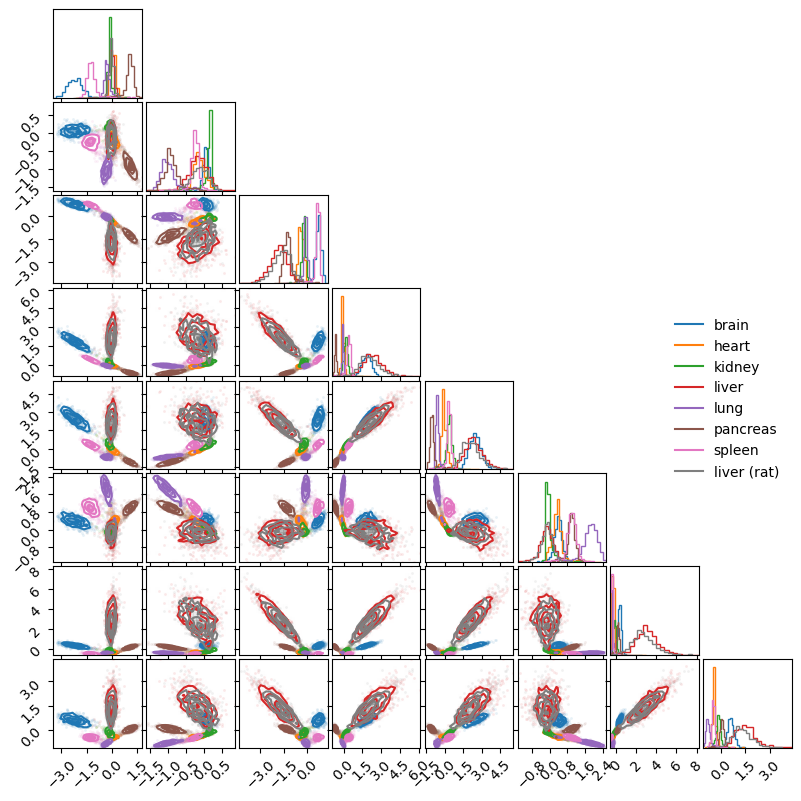

In [109]:
import corner
import matplotlib.lines as mlines
fig = plt.figure(figsize=(8,8))

colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7"]
str_labels = ["brain", "heart", "kidney", "liver", "lung", "pancreas", "spleen", "liver (rat)"]

for i in list(np.unique(labels)):
    corner.corner(output[labels==i],fig=fig,color=colors[i])
plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=str_labels[i]) for i in list(np.unique(labels))
        ],bbox_to_anchor=(1, 5),frameon=False, loc="upper right"
    )
plt.show()